Nombre: Rosa Garrote Jofré

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/solemne1_taller/Chocolate_Sol01.xlsx')
df.head()

,País,Producto,Valor,Unidades
0,Canada,85% Dark Bars,3.584,200
1,UK,After Nines,3.038,135
2,New Zealand,Peanut Butter Cubes,7.490,315
3,USA,Smooth Sliky Salty,10.458,316
4,USA,After Nines,3.003,155


#Análisis de la distribución de valores de ventas

Observa la variable Valor, que representa el monto total de las ventas de los productos. Crea un histograma de esta variable y calcula las medidas de tendencia central (media y mediana).

Responde las siguientes preguntas:

- ¿Qué puedes deducir sobre la distribución de los valores de venta a partir del histograma?
- ¿La distribución parece simétrica o sesgada? ¿Hacia qué valores se está sesgando?
- ¿La media y la mediana son similares? ¿Qué nos dice esto sobre la distribución?

In [3]:
round (df['Valor'].agg(['mean', 'median']), 2 )

,Valor
mean,6.29
median,5.68


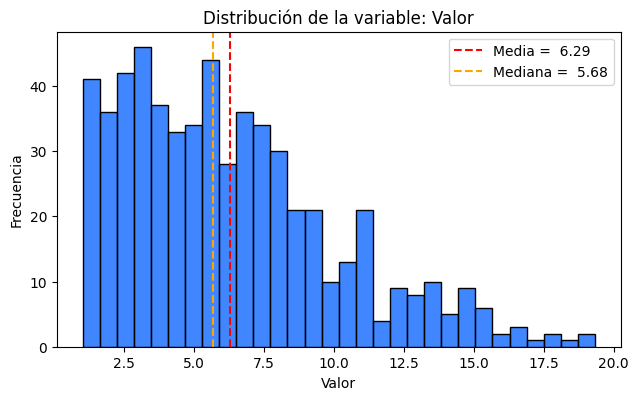

In [4]:
mean = df['Valor'].mean()
median = df['Valor'].median()

a = 2.2

plt.figure(figsize = (16/a, 9/a))

sns.histplot(df['Valor'], bins = 30, color = '#005FFF', edgecolor = 'black')
plt.axvline(mean, color = 'red', linestyle = '--', label =f'Media = {mean: .2f}')
plt.axvline(median, color = 'orange', linestyle = '--', label =f'Mediana = {median: .2f}')


plt.title ('Distribución de la variable: Valor')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

- ¿Qué puedes deducir sobre la distribución de los valores de venta a partir del histograma?

Desde el analísis de la distribucion de los valores se puede observar que las ventas poseen una media en 6.29 y una mediana en 5.68. Además, los valores más bajos estan hacia el lado izquierdo del grafico, lo que indica un sesgo positivo.

- ¿La distribución parece simétrica o sesgada? ¿Hacia qué valores se está sesgando?

La distribución de valores parece sesgada, porque los valores más altos tienden a declinar hacia la derecha, provocando que la media se situe hacia el mismo lado.

- ¿La media y la mediana son similares? ¿Qué nos dice esto sobre la distribución?

La media y mediana no son similares, pues la media es mas mayor que la mediana, lo que corrobora el sesgo sea hacia la derecha.

#Identificación de valores atípicos en el producto "After Nines"

Para el producto "After Nines", crea un gráfico de caja (boxplot) de la variable Valor y responde las siguientes preguntas:

- ¿Hay valores atípicos (outliers) en las ventas de este producto? Además, observa los cuartiles en el gráfico de caja. ¿Cómo se distribuyen los datos en torno al primer cuartil (Q1), la mediana (Q2) y el tercer cuartil (Q3)? ¿Qué nos dicen estos valores sobre la distribución de las ventas?
- ¿Cuál es la desviación estándar y el coeficiente de variación de las ventas de "After Nines"? ¿Qué nos indican estos valores sobre la dispersión de las ventas de este producto?

In [5]:
df['Producto'].unique()

array(['85% Dark Bars', 'After Nines', 'Peanut Butter Cubes',
       'Smooth Sliky Salty', 'Mint Chip Choco'], dtype=object)

In [6]:
df_PBC = df[df['Producto'] == 'After Nines']

/tmp/ipython-input-535259473.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


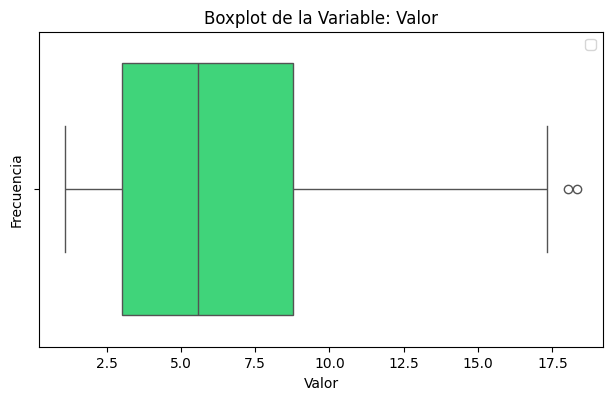

In [7]:
a = 2.2
plt.figure(figsize = (16/a, 9/a))

sns.boxplot(df_PBC['Valor'], orient = 'h', color = '#27ED75')



plt.title ('Boxplot de la Variable: Valor')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

In [8]:
df_PBC['Valor'].quantile([0.25, 0.5, 0.75])

,Valor
0.25,3.0065
0.50,5.5790
0.75,8.7885


In [9]:
PBC_std = df_PBC['Valor'].std()
PBC_cv = df_PBC['Valor'].std()/df_PBC['Valor'].mean()

In [10]:
print(f'La desviacion estandar de la variable es: {PBC_std: .2f}')
print(f'El coeficiente de variacion es: {PBC_cv: .2%}')

La desviacion estandar de la variable es:  4.17
El coeficiente de variacion es:  64.67%


In [11]:
df_PBC['Valor'].quantile([0.25, 0.5, 0.75])

,Valor
0.25,3.0065
0.50,5.5790
0.75,8.7885


- ¿Hay valores atípicos (outliers) en las ventas de este producto? Además, observa los cuartiles en el gráfico de caja.
¿Cómo se distribuyen los datos en torno al primer cuartil (Q1), la mediana (Q2) y el tercer cuartil (Q3)? ¿Qué nos dicen estos valores sobre la distribución de las ventas?

Si, hay dos valores atípicos (outliers).
En el primer cuartil (Q1) se observa que los datos se acercan a 3.0065, por lo tanto un cuarto de los valores estan bajos.
El segundo cuartil (Q2), se situa en 5.5790, lo que significa que esto corresponderia a la mediana de los datos, o sea al 50%.

El tercer cuartil (Q3),siendo el 75% de los datos con un valor menor o igual a 8.7885.

Estos valores nos indican que las ventas del producto "After Nines", estan mas cerca de Q1, o sea desde el lado de los valores mas bajos, por lo tanto hay mas ventas de valores bajos, mientras que en los valores altos hay menos ventas y estos a su vez generan los outliers.  

- ¿Cuál es la desviación estándar y el coeficiente de variación de las ventas de "After Nines"? ¿Qué nos indican estos valores sobre la dispersión de las ventas de este producto?

La desviación estándar es de 4,17 y el coeficiente de variación de las ventas es de 64,67%.
Estos datos nos indican que las ventas deel producto son inestables, por lo que las ventas pueden no ser lo esperado.

#Análisis comparativo del valor promedio de ventas por país
Crea un gráfico de barras que muestre el valor promedio de ventas (Valor) por país. Luego, responde lo siguiente:

- ¿Qué país tiene el valor promedio de ventas más alto y cuál tiene el más bajo?
- ¿Hay algún país con una gran desviación en las ventas, según las medidas descriptivas (como la desviación estándar y el rango)?
- ¿Qué estrategias recomendarías basándote en las diferencias de ventas promedio entre los países?

In [12]:
df.groupby('País')['Valor'].agg(['mean', 'std'])

,mean,std
País,,
Australia,6.224437,3.588563
Canada,6.263437,3.784143
India,6.730043,4.028062
New Zealand,6.031763,3.724842
UK,5.926489,3.628159
USA,6.621247,4.309597


/tmp/ipython-input-2729831553.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = a.index, y = a.values, palette = 'pastel')


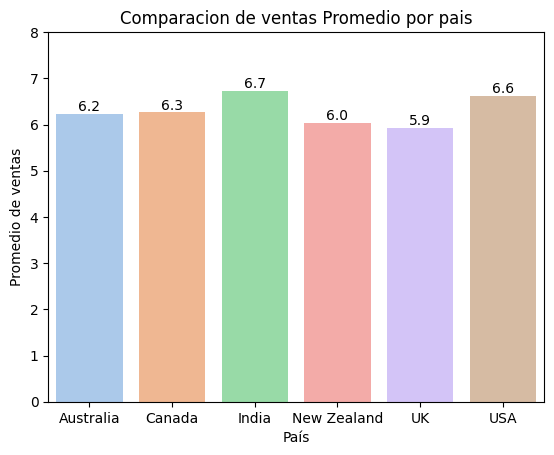

In [13]:
#grafico de barras
a = df.groupby('País')['Valor'].agg('mean')

ax = sns.barplot(x = a.index, y = a.values, palette = 'pastel')

for c in ax.containers:
  ax.bar_label(c, fmt = '%.1f')

plt.ylim(0, 8)
plt.title ('Comparacion de ventas Promedio por pais')
plt.ylabel('Promedio de ventas')
plt.xlabel('País')
plt.show()

In [14]:
df.groupby('País')['Unidades'].std()

,Unidades
País,
Australia,120.744678
Canada,156.213918
India,132.154655
New Zealand,119.418898
UK,109.177428
USA,104.843864


In [15]:
df.groupby('País')['Unidades'].agg(lambda x: x.max() - x.min())

,Unidades
País,
Australia,544
Canada,708
India,579
New Zealand,514
UK,552
USA,425


In [16]:
df.groupby('País')['Unidades'].agg(desviacion_estandar = 'std')

,desviacion_estandar
País,
Australia,120.744678
Canada,156.213918
India,132.154655
New Zealand,119.418898
UK,109.177428
USA,104.843864


- ¿Qué país tiene el valor promedio de ventas más alto y cuál tiene el más bajo?

El país con el valor promedio más alto es la India, con 6.7 y el más bajo es UK con 5.9.

- ¿Hay algún país con una gran desviación en las ventas, según las medidas descriptivas (como la desviación estándar y el rango)?

En el caso del analísis de los paises, podemos observar que Canadá tiene la desviación mas alta, mientras que Estados Unidos tiene la más baja.

¿Qué estrategias recomendarías basándote en las diferencias de ventas promedio entre los países?

Como estrategia según los datos analizados, podria recomendar incentivar las ventas através de promociones, posicionando a los productos como uno de los preferidos para los consumidores, tanto en paises donde sus ventas tienen buen promedio y más aun en aquellos donde las ventas son bajas.


